# Customer Churn Analysis

## Customer Churn Analysis

The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
Help them identify the types of customers who churn
Predict who of their current customers will churn next month

To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.

# Deliverables - What is expected
### Week 1


A presentation explaining churn for the marketing team - with links to technical aspects of your work. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.
- 1- How much is churn affecting the business? 
  How big is churn compared to the existing customer base?
- 2- Explain churn by the below categories. Are there any factors that combine to be especially impactful?
     A- Customer demographics like age and gender
     B- Services used 
     C- Billing information
- 3- what vices are typically purchased by customers who churned? Are any services especially helpful in retaining customers?
- 4- Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
url='datase_Churn/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (1).csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1- How much is churn affecting the business? How big is churn compared to the existing customer base?

Churn
No     5174
Yes    1869
dtype: int64

Text(0.5, 1.0, 'Percent of Churn')

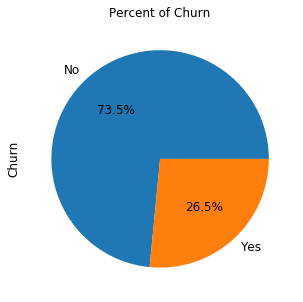

In [12]:
display(df.groupby(['Churn']).size())

ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Percent of Churn', fontsize = 12)


# How much is churn affecting the business?
Rep: The churn affects the company compared to the 1869 customers who have unsubscribed.  

## How big is churn compared to the existing customer base?
Rep: there are about 26 percent of people who have unsubscribed, so the company has lost a large portion of its customers.

### 2- Explain churn by the below categories. Are there any factors that combine to be especially impactful?
* A- Customer demographics like age and gender 
* B- Services used 
* C- Billing information

### A- Customer demographics like age and gender

In [4]:
df.groupby(['SeniorCitizen','gender','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,SeniorCitizen,gender,Churn,size
0,0,Female,No,2221
1,0,Female,Yes,699
2,0,Male,No,2287
3,0,Male,Yes,694
4,1,Female,No,328
5,1,Female,Yes,240
6,1,Male,No,338
7,1,Male,Yes,236


In [5]:
df.groupby(['gender','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,gender,Churn,size
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


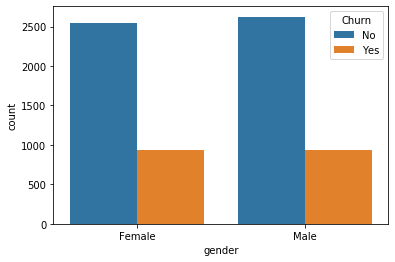

In [37]:
ax = sns.countplot(x="gender", hue="Churn", data = df)
##ax.set_title("trans")

# A- Customer demographics like age and gender
In the case of desafectation there are more women who have unsubscribed. 

In [6]:
df.groupby([ "SeniorCitizen", "Churn",]).size().to_frame().rename(columns ={0: "size"}).reset_index()

,SeniorCitizen,Churn,size
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


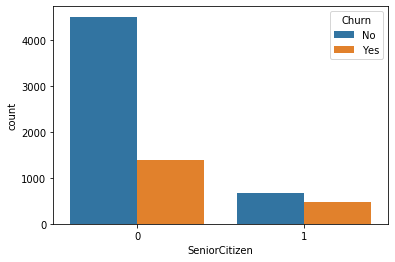

In [36]:
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data = df)
#ax.set_title("trans")

In [ ]:
# A- Customer demographics like age and gender
Rep:

### B- Services used

In [9]:
df.groupby(['PhoneService','MultipleLines','InternetService','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingMovies,StreamingTV,TechSupport,Churn,size
0,No,No phone service,DSL,No,No,No,No,No,77
1,No,No phone service,DSL,No,No,No,No,Yes,54
2,No,No phone service,DSL,No,No,No,Yes,No,43
3,No,No phone service,DSL,No,No,No,Yes,Yes,9
4,No,No phone service,DSL,No,No,Yes,No,No,13
...,...,...,...,...,...,...,...,...,...
159,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,41
160,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,162
161,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,23
162,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No,332


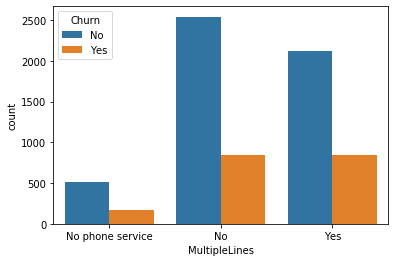

In [10]:
ax = sns.countplot(x="MultipleLines", hue="Churn", data = df)

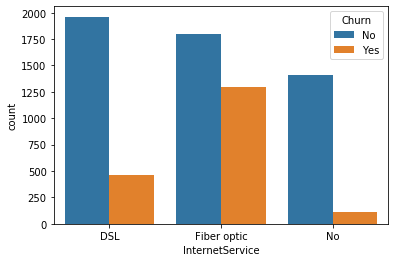

In [11]:
ax = sns.countplot(x="InternetService", hue="Churn", data = df)

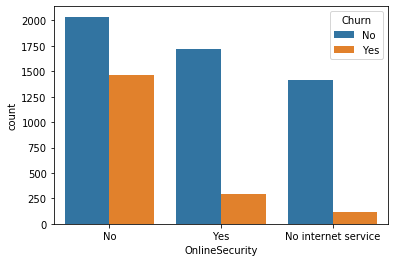

In [12]:
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data = df)

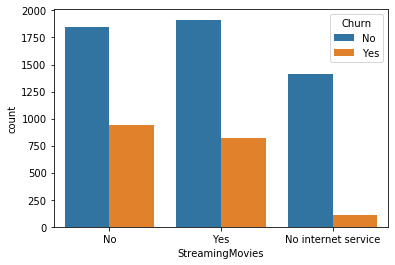

In [13]:
ax = sns.countplot(x="StreamingMovies", hue="Churn", data = df)

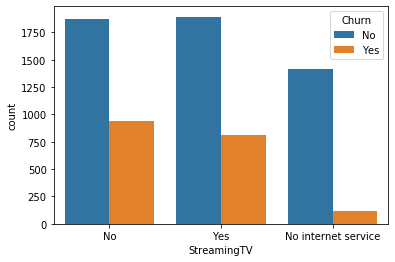

In [14]:
ax = sns.countplot(x="StreamingTV", hue="Churn", data = df)

### C-Billing information

In [15]:
df.groupby(['PaperlessBilling','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PaperlessBilling,Churn,size
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


In [16]:
df.groupby(['PaymentMethod','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PaymentMethod,Churn,size
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


In [17]:
df.groupby(['MonthlyCharges','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,MonthlyCharges,Churn,size
0,18.25,No,1
1,18.40,No,1
2,18.55,No,1
3,18.70,No,2
4,18.75,No,1
...,...,...,...
2365,118.20,No,1
2366,118.35,Yes,1
2367,118.60,No,2
2368,118.65,No,1


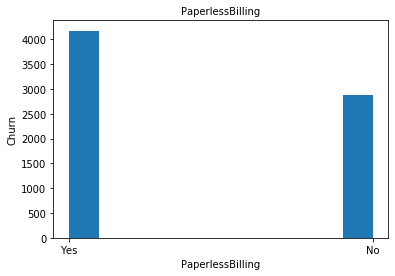

In [18]:

plt.hist(df['PaperlessBilling'])

plt.title("PaperlessBilling", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('PaperlessBilling')
plt.show()

In [19]:
df['PaperlessBilling'].describe().to_frame()

,PaperlessBilling
count,7043
unique,2
top,Yes
freq,4171


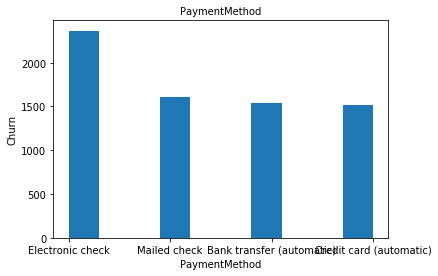

In [20]:
plt.hist(df['PaymentMethod'])

plt.title("PaymentMethod", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('PaymentMethod')
plt.show()


In [21]:
df['PaymentMethod'].describe().to_frame()

,PaymentMethod
count,7043
unique,4
top,Electronic check
freq,2365


In [22]:
df['MonthlyCharges'].describe().to_frame()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


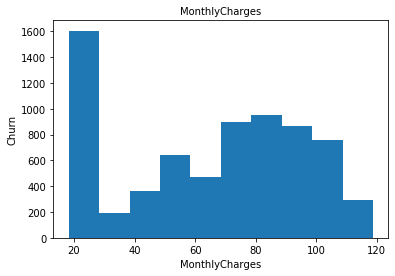

In [23]:

plt.hist(df['MonthlyCharges'])

plt.title("MonthlyCharges", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('MonthlyCharges')
plt.show()



In [24]:
### explicatiion

### 3- what vices are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

In [51]:
data_Churn = df[df.Churn== 'Yes']
data_Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


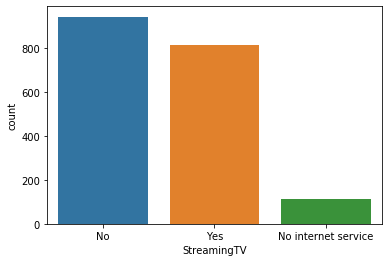

In [52]:
ax = sns.countplot(x="StreamingTV", data = data_Churn)

### people using streamtv services are more likely to unsubscribe

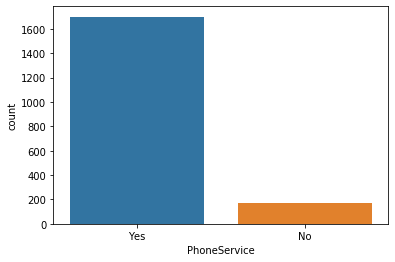

In [53]:
ax = sns.countplot(x="PhoneService", data = data_Churn)

In [ ]:
people using streamtv services are more likely to unsubscribe

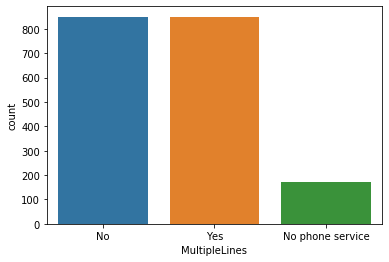

In [54]:
ax = sns.countplot(x="MultipleLines", data = data_Churn)

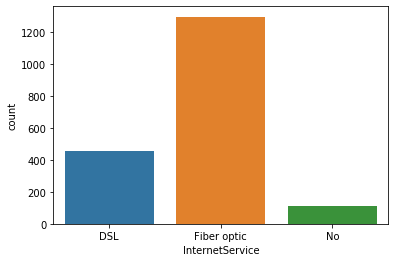

In [55]:
ax = sns.countplot(x="InternetService", data = data_Churn)

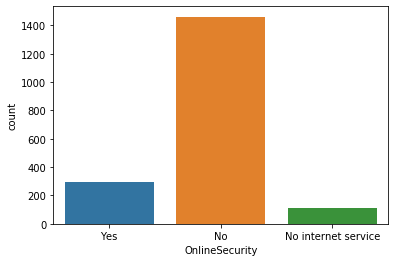

In [56]:
ax = sns.countplot(x="OnlineSecurity", data = data_Churn)

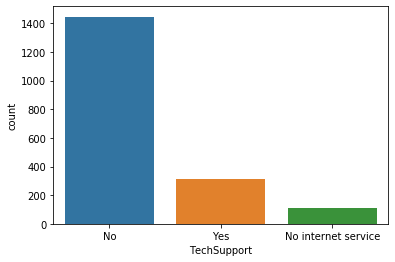

In [58]:
ax = sns.countplot(x="TechSupport", data = data_Churn)

In [ ]:
service1= val.groupby(['MultipleLines','gender']).size().to_frame()
service1

In [39]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Text(0.5, 1.0, 'Customer demographics InternetService')

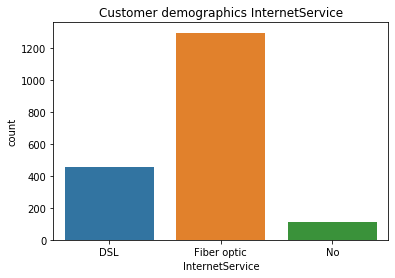

In [57]:
ax = sns.countplot(x="InternetService",data= data_Churn )
ax.set_title("Customer demographics InternetService")


In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


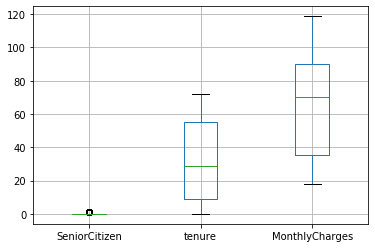

In [31]:
df.boxplot()

In [40]:
dt_Churn.corr()

NameError: name 'dt_Churn' is not defined

In [42]:
df.shape

(7043, 21)